# Quantum Machine Learning
## Day 1: Introduction to Qubits

A *qubit* is a two-dimensional quantum-mechanical system that is in a state 

$$
|\phi \rangle = \alpha |0\rangle + \beta |1\rangle = 
\begin{pmatrix}
\alpha \\
\beta \\
\end{pmatrix},
$$

with $|0\rangle = (0,1)^\top$ and $|1\rangle = (1,0)^\top.$ Note that $\alpha$ and $\beta$ are complex conjugated numbers with $|\alpha|^2+|\beta|^2=1$. With a probability of $|\alpha|^2$, we observe $0$, whereas we observe $1$ with a probability of $|\beta|^2$. 

This system can undergo different operations, e.g. Hadamard transformation. All these transformations must fulfill one important property: they have to be *unitary transformations*. A matrix with complex entries is unitary if the matrix itself multiplicated with its transposed and complex conjugated matrix is equal to the identity matrix. Therefore we simply perform reversible operations on quibits. These operations can be visualised by rotating the state vector. Mathematically that means that we multiplicate the unitary transformation matrix on to the qubit state: 

$$
|\phi \rangle \rightarrow U | \phi \rangle =
\begin{pmatrix}
U_{00} \alpha + U_{01} \beta \\
U_{10} \alpha + U_{11} \beta \\
\end{pmatrix}.
$$

In [4]:
import sys
sys.path.append('/Users/Farina/miniconda3/envs/Qiskit/lib/python3.6/site-packages')

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit.tools.visualization import circuit_drawer
from qiskit import Aer
import numpy as np
from qiskit.tools.visualization import plot_histogram, plot_state

## Visualisation Qubit

The Bloch sphere is a geometric representation of qubit states as points on the surface of a unit sphere. Using the standard basis vectors $|0 \rangle$ and $|1 \rangle$, this 2-sphere geometric representation positions the $|0 \rangle$ at its north pole and the $|1 \rangle$ at its south pole.

In [44]:
def state_2_rho(state):
    return np.outer(state, state.conj())

In [59]:
n = 1  # number of qubits 
q = QuantumRegister(n)
c = ClassicalRegister(n)

qc = QuantumCircuit(q, c)
qc.x(q[0])

# execute the quantum circuit 
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state_superposition = job.result().get_statevector(qc)
state_superposition

array([0.+0.j, 1.+0.j])

In [60]:
rho_superposition=state_2_rho(state_superposition)

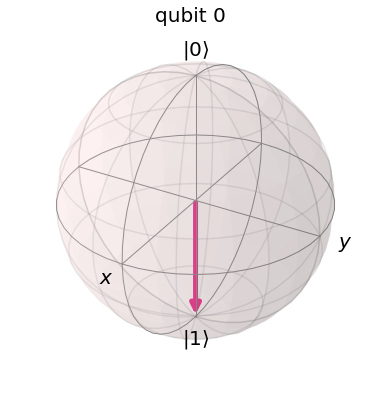

In [61]:
plot_state(rho_superposition,'bloch')

## Visualisation Entanglement

In [23]:
# Create a Quantum Register with 2 qubits
qr = QuantumRegister(2)

# Create a Classical Register with 2 bits
cr = ClassicalRegister(2)

# Create a Quantum Circuit acting on the qr and cr register
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])

# CNOT (Controlled-NOT) gate from qubit 0 to qubit 1
circuit.cx(qr[0], qr[1])

# measure gate from qr to cr
circuit.measure(qr,cr);
#circuit.measure(qr, cr);

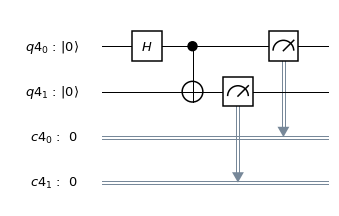

In [24]:
circuit_drawer(circuit)

In [25]:
backend = Aer.get_backend('qasm_simulator')

# Create a Quantum Program for execution 
job = execute(circuit, backend)

In [26]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [27]:
result = job.result()

In [28]:
result.get_data()

{'counts': {'00': 530, '11': 494}}

In [30]:
rho_superposition=state_2_rho(state_superposition)
print(rho_superposition)

[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


In [14]:
n = 2  # number of qubits 
q = QuantumRegister(n)
c = ClassicalRegister(n)

qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])



# execute the quantum circuit 
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state_superposition = job.result().get_statevector(qc)
state_superposition

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

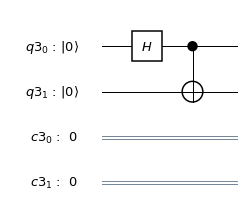

In [15]:
circuit_drawer(qc)